## Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dtw import DTW

## Core Algorithm

In [10]:
signal1 = np.random.rand(15)
signal2 = np.random.rand(17)

print(signal1.shape,type(signal2))

(15,) <class 'numpy.ndarray'>


In [11]:
def dtw(signal1:np.array,signal2:np.array,normalized:bool=True):

    N,M = len(signal1),len(signal2)

    # calculate the distance between signals
    distance_matrix = np.zeros(shape=(N,M))
    for i in range(N):
        for j in range(M):
            distance_matrix[i,j] = abs(signal1[i]-signal2[j])

    # # Initialize the cos matrix
    cost_matrix = np.full((N+1, M+1), np.inf)
    cost_matrix[0, 0] = distance_matrix[0,0]

    # filling the cost matrix
    traceback = np.zeros(shape=(N,M))
    for i in range(N):
        for j in range(M):
            choices=[
                cost_matrix[i,j],      # match (0)
                cost_matrix[i,j+1],    # insertion (1)
                cost_matrix[i+1,j]     # deletion (2)
            ]

            min_choice = np.argmin(choices)
            cost_matrix[i+1,j+1] = distance_matrix[i,j] + choices[min_choice]

            traceback[i,j]=min_choice

    dtw_distance = cost_matrix[N,M]

    # traceback from bottom right
    i = N-1
    j = M-1
    path = [(i,j)]
    while i>0 or j>0:
        # Handle boundaries explicitly
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            tb_direction = traceback[i, j]
            if tb_direction == 0:  # diagonal
                i -= 1
                j -= 1
            elif tb_direction == 1:  # up/insertion
                i -= 1
            elif tb_direction == 2:  # left/deletion
                j -= 1
        path.append((i, j))
    path.reverse()

    if normalized:
        return dtw_distance/len(path),distance_matrix,cost_matrix,path
    else:
        return dtw_distance,distance_matrix,cost_matrix,path
    


In [12]:
distance,distance_matrix,cost_matrix,path = dtw(signal1,signal2)
print(distance)

0.18700724089767515


(np.float64(-0.8),
 np.float64(16.8),
 np.float64(-1.5448643081079496),
 np.float64(2.684867460930584))

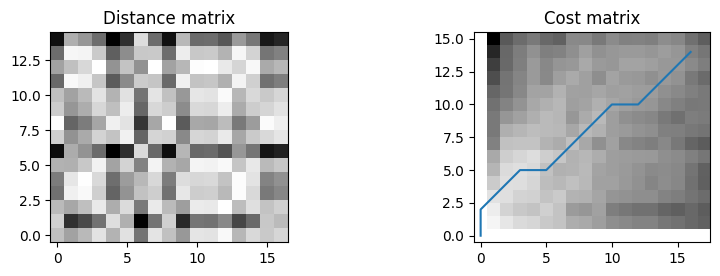

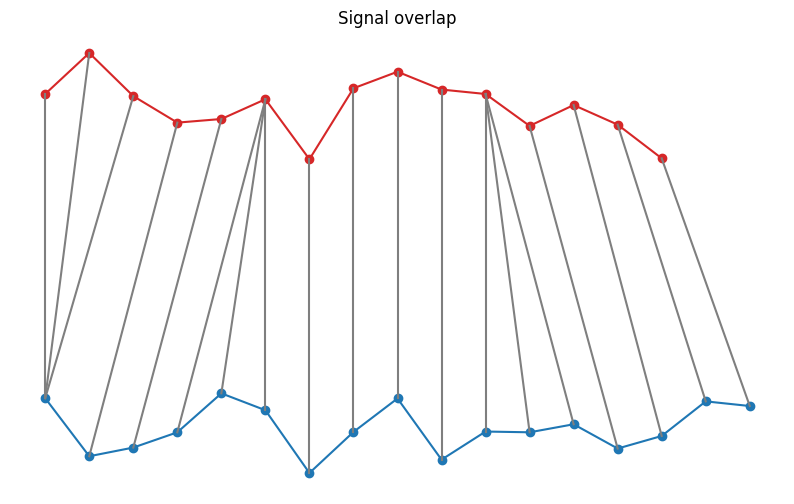

In [21]:
# Visualize the signals, distance matrix and cost matrix with path

plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
plt.title("Distance matrix")
plt.imshow(distance_matrix, cmap=plt.cm.binary, interpolation="nearest", origin="lower")

plt.subplot(2,2,2)
plt.title("Cost matrix")
plt.imshow(cost_matrix, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path, x_path)

plt.figure(figsize=(10,6))
plt.title("Signal overlap")
plt.plot(np.arange(signal1.shape[0]), signal1 + 1.5, "-o", c="C3")
plt.plot(np.arange(signal2.shape[0]), signal2 - 1.5, "-o", c="C0")
for x_i, y_j in path:
    plt.plot([x_i, y_j], [signal1[x_i] + 1.5, signal2[y_j] - 1.5], c="C7")
plt.axis("off")